<a href="https://colab.research.google.com/github/cibelemoraes/Transfer-Learning-YOLO-com-COCO-no-Colaboraty/blob/main/TREINAMENTO_REDE_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalando três bibliotecas, para poder usar o Modelo YOLOv8 para detecção e segmentação de Objetos e matplotlib para visualização de gráficos e imagens, Opencv para processamento de imagem e vídeo

In [1]:
!pip install ultralytics opencv-python matplotlib
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

#Importando YOLO


In [2]:
from ultralytics import YOLO

# Carregar o modelo YOLOv8 pré-treinado no COCO Dataset
model = YOLO("yolov8n.pt")

# Testando se o modelo carregou corretamente
print("Modelo YOLO carregado com sucesso!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 168MB/s]

Modelo YOLO carregado com sucesso!


#Importando bibliotecas necessárias para tarefas de visão computacional e inteligência artificial que serão utilizadas nesse treinamento em especifico


In [3]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tensorflow as tf

#configurando a GPU4, também realizei o ajusta manual 'Editar → Configurações do notebook → Acelerador de hardware'

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Configuração de memória da GPU ajustada!")
    except RuntimeError as e:
        print(e)

Configuração de memória da GPU ajustada!


#carregando  o modelo pré-treinado YOLOv8n


In [5]:
model = YOLO("yolov8n.pt")

#Iniciando o treinamento do modelo com o COCO dataset


In [6]:
model.train(data="coco.yaml", epochs=1, batch=16)

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

100%|██████████| 169M/169M [00:01<00:00, 96.1MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:19<00:00, 6319.81file/s]

Dataset download success ✅ (726.1s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 36.1MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

 22        [15, 18, 21]  1    897664  ultralytics.nn.modules.head.Detect           [80, [64, 128, 256]]          
Model summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 139MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 300.9±621.7 MB/s, size: 145.2 KB)


train: Scanning /content/datasets/coco/labels/train2017... 117266 images, 1021 backgrounds, 0 corrupt: 100%|██████████| 118287/118287 [05:51<00:00, 336.40it/s]


train: New cache created: /content/datasets/coco/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.3±0.6 ms, read: 22.8±5.5 MB/s, size: 135.2 KB)


val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:14<00:00, 337.30it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.67G      1.102      1.341      1.162        189        640: 100%|██████████| 7393/7393 [59:36<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [01:05<00:00,  2.38it/s]


                   all       5000      36335      0.606      0.454      0.493      0.347

1 epochs completed in 1.014 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [01:04<00:00,  2.45it/s]


                   all       5000      36335      0.607      0.453      0.493      0.346
                person       2693      10777      0.784      0.638      0.735      0.503
               bicycle        149        314      0.678       0.35      0.431      0.245
                   car        535       1918      0.646      0.507      0.552      0.352
            motorcycle        159        367      0.707      0.553       0.63      0.387
              airplane         97        143      0.775      0.713      0.814      0.612
                   bus        189        283      0.657      0.633      0.711      0.588
                 train        157        190      0.799      0.726      0.803      0.606
                 truck        250        414      0.556      0.341      0.419      0.281
                  boat        121        424      0.515      0.292      0.361      0.194
         traffic light        191        634      0.643      0.338      0.382       0.19
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0d3756af90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

#Definindo o caminho da imagem que será usada para fazer a predição

In [8]:

image_path = "/media/images.jpeg"  # Ajuste o caminho da sua imagem
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Rodando o modelo YOLOv8 na imagem

In [9]:
results = model(image)


0: 448x640 1 person, 11 cars, 1 bus, 1 traffic light, 49.5ms
Speed: 5.5ms preprocess, 49.5ms inference, 9.8ms postprocess per image at shape (1, 3, 448, 640)


#Para os resultados iremos colocar coordenadas , as metricas de confiança, o nome das classes na imagem

In [10]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordenadas da caixa
        conf = box.conf[0].item()  # Confiança
        label = result.names[int(box.cls[0])]  # Nome da classe

        # Desenhar a caixa e o rótulo na imagem
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#Utilizando a matplotlib para exibir a imagem no Primeiro testes


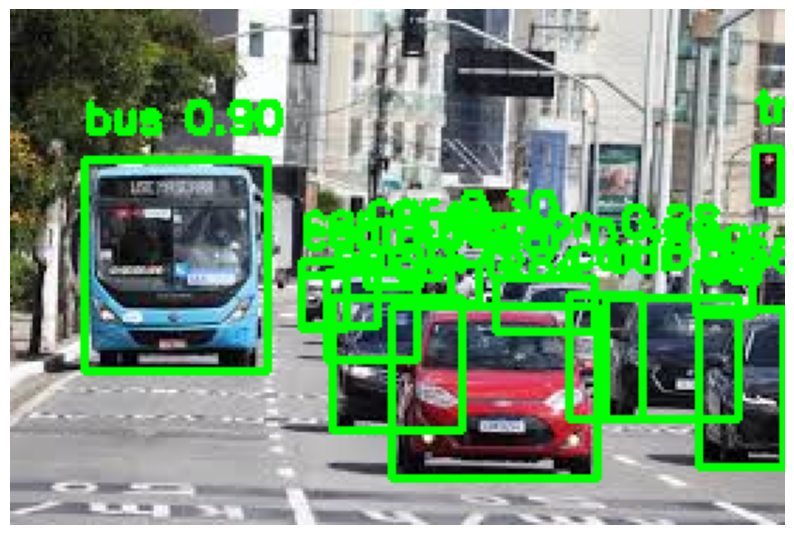

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

In [12]:
image_path = "/media/animais.jpeg"  # Ajuste o caminho da sua imagem
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
results = model(image)


0: 384x640 1 cat, 2 dogs, 64.0ms
Speed: 5.2ms preprocess, 64.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


In [14]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordenadas da caixa
        conf = box.conf[0].item()  # Confiança
        label = result.names[int(box.cls[0])]  # Nome da classe

        # Desenhar a caixa e o rótulo na imagem
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#Utilizando a matplotlib para exibir a imagem no segundo testes


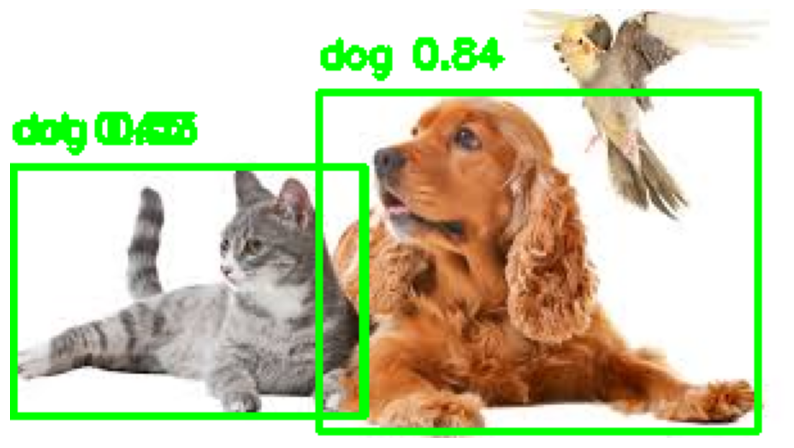

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()